In [1]:
#importing the required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

Now let's load the required data set and begin with visualizing it

In [2]:
digits = datasets.load_digits()       #loading the digits dataset
print(digits.keys())                  #lets figure out what all does this dataset contain

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])


Now lets see what is present in these keys and of what type they are.<br>
Based on our information we can figure out what are the keys which are required for our visualization.

In [3]:
print(digits.data[0])
print(f"\nthe type of data available is {type(digits.data[0])}")
print(f"the shape of the data is {digits.data[0].shape}")

[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]

the type of data available is <class 'numpy.ndarray'>
the shape of the data is (64,)


Now that we have figured out how the data looks like, let's do this to all the other keys and find out what is present

In [4]:
print(type(digits.feature_names))
print(digits.feature_names)

<class 'list'>
['pixel_0_0', 'pixel_0_1', 'pixel_0_2', 'pixel_0_3', 'pixel_0_4', 'pixel_0_5', 'pixel_0_6', 'pixel_0_7', 'pixel_1_0', 'pixel_1_1', 'pixel_1_2', 'pixel_1_3', 'pixel_1_4', 'pixel_1_5', 'pixel_1_6', 'pixel_1_7', 'pixel_2_0', 'pixel_2_1', 'pixel_2_2', 'pixel_2_3', 'pixel_2_4', 'pixel_2_5', 'pixel_2_6', 'pixel_2_7', 'pixel_3_0', 'pixel_3_1', 'pixel_3_2', 'pixel_3_3', 'pixel_3_4', 'pixel_3_5', 'pixel_3_6', 'pixel_3_7', 'pixel_4_0', 'pixel_4_1', 'pixel_4_2', 'pixel_4_3', 'pixel_4_4', 'pixel_4_5', 'pixel_4_6', 'pixel_4_7', 'pixel_5_0', 'pixel_5_1', 'pixel_5_2', 'pixel_5_3', 'pixel_5_4', 'pixel_5_5', 'pixel_5_6', 'pixel_5_7', 'pixel_6_0', 'pixel_6_1', 'pixel_6_2', 'pixel_6_3', 'pixel_6_4', 'pixel_6_5', 'pixel_6_6', 'pixel_6_7', 'pixel_7_0', 'pixel_7_1', 'pixel_7_2', 'pixel_7_3', 'pixel_7_4', 'pixel_7_5', 'pixel_7_6', 'pixel_7_7']


We can clearly see that the dataset has 64 columns of pure data which make up the 64 pixels of the image <br>
But this data is not convinent for us to visualize so let us take a look at the 'images' key to find out can it be of some use

In [5]:
print(type(digits.images))
print(digits.images[0].shape)

<class 'numpy.ndarray'>
(8, 8)


this 8*8 matrix is really useful in visualizing <br> So let's begin

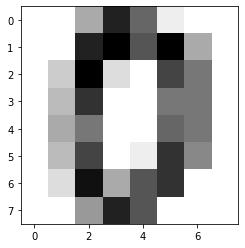

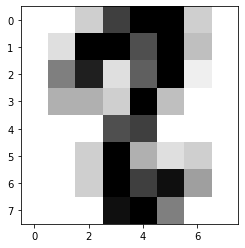

In [6]:
#now let's plot
plt.imshow(digits.images[0], cmap=plt.cm.gray_r, interpolation = None)
plt.show()
plt.imshow(digits.images[700], cmap=plt.cm.gray_r, interpolation = None)
plt.show()

now lets run a classification algorithm on this dataset.

<h4>Classifiation part(Machine learning)</h4>

In [7]:
#Splitting the dataset into testing and training
X = digits.data
y = digits.target
X_test, X_train, y_test, y_train = train_test_split(X, y, test_size = 0.3, random_state = 42, stratify = y)
#this dunction splits the data on the basis of the sixe given

For the nearest neighbor value we will run a trial and error method to ind the optimum value

In [8]:
neighbors = np.arange(1,11) #numpy array of 1-15
train_accuracy = np.empty(len(neighbors))        #array which will hold the values of the neighbor accuracy for traing data
test_accuracy = np.empty(len(neighbors))         #array which will hold the values of the neighbor accuracy for test dataset

In [9]:
for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    train_accuracy[i] = knn.score(X_train, y_train)
    test_accuracy[i] = knn.score(X_test , y_test)

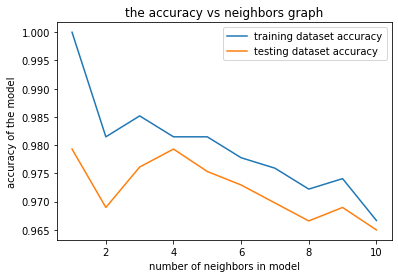

In [10]:
#now that we have the values of the accuracies in our arrays its time to plot them
plt.title("the accuracy vs neighbors graph")
plt.plot(neighbors, train_accuracy, label = 'training dataset accuracy')
plt.plot(neighbors, test_accuracy, label = 'testing dataset accuracy')
plt.legend()
plt.xlabel('number of neighbors in model')
plt.ylabel('accuracy of the model')
plt.show()

From the plot we can see there is a sweet spot at neighbors = 4 so lets execute this and cross validate it

In [11]:
knn = KNeighborsClassifier(n_neighbors = 4)
knn.fit(X_train, y_train)
knn.score(X_test, y_test)

0.979315831344471

In [12]:
knn = KNeighborsClassifier(n_neighbors = 4)
val = cross_val_score(knn, 
                      digits.data,
                      digits.target,
                      cv = 10)
print(np.mean(val))

0.9721818746120421


Thus we have cross validated our test and train data sets' accuracy

<b><center>Now we will use a different technique to calculate the value of k</center></b>

In [13]:
cross_val_accuracy = np.empty(len(neighbors))
for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors = k)
    cross_valid = cross_val_score(knn,
                                  digits.data,
                                  digits.target,
                                  cv = 10)
    cross_val_accuracy[i] = np.mean(cross_valid)
print(cross_val_accuracy)

[0.97496276 0.9744072  0.97663253 0.97218187 0.97107387 0.96828988
 0.96773433 0.96494413 0.96494413 0.96216325]


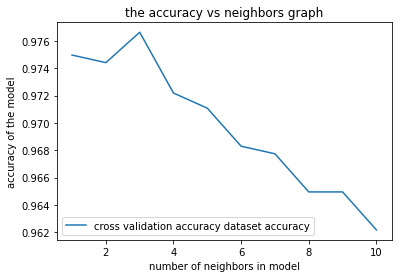

In [14]:
plt.title("the accuracy vs neighbors graph")
plt.plot(neighbors, cross_val_accuracy, label = 'cross validation accuracy dataset accuracy')
plt.legend()
plt.xlabel('number of neighbors in model')
plt.ylabel('accuracy of the model')
plt.show()

In this method of validation, we see that the sweet spot lies at n_neighbors = 3
thus lets verify it as well

In [15]:
knn = KNeighborsClassifier(n_neighbors = 3)
val = cross_val_score(knn, 
                      digits.data,
                      digits.target,
                      cv = 10)
print(np.mean(val))

0.9766325263811299


Thus we have cross validated our test and train data sets' accuracy